In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf, numpy as np , datetime as dt , matplotlib.pyplot as plt
from scipy.stats import norm


In [3]:
tickers = ['AAPL','GOOGL','C','DIS','F','MSFT','MS','NVDA','TSLA','AMZN']
weights  = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

In [18]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

df = yf.download(tickers,start,end)['Adj Close']
df

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,AMZN,C,DIS,F,GOOGL,MS,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2020-01-02,73.059433,94.900497,68.963684,147.718567,7.864790,68.433998,45.443272,154.493790,59.741241,28.684000
2020-01-03,72.349144,93.748497,67.664711,146.024094,7.689461,68.075996,44.709747,152.570129,58.785027,29.534000
2020-01-06,72.925629,95.143997,67.452469,145.176849,7.647714,69.890503,44.552567,152.964462,59.031540,30.102667
2020-01-07,72.582672,95.343002,66.866684,145.226685,7.722857,69.755501,44.465233,151.569794,59.746220,31.270666
2020-01-08,73.750237,94.598503,67.376068,144.927658,7.722857,70.251999,45.032848,153.984039,59.858269,32.809334
...,...,...,...,...,...,...,...,...,...,...
2024-03-12,173.229996,175.389999,57.450001,112.459999,12.110000,138.500000,87.050003,415.279999,919.130005,177.539993
2024-03-13,171.130005,176.559998,57.759998,112.500000,12.370000,139.789993,89.349998,415.100006,908.880005,169.479996
2024-03-14,173.000000,178.750000,57.090000,112.059998,12.080000,143.100006,89.099998,425.220001,879.440002,162.500000


In [5]:
returns = df.pct_change()
returns

Ticker,AAPL,AMZN,C,DIS,F,GOOGL,MS,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.025241,-0.018121,-0.024227,-0.015190,-0.027696,-0.017822,-0.036788,-0.060417,-0.031472
2019-01-04,0.042689,0.050064,0.048897,0.030847,0.038561,0.051294,0.040827,0.046509,0.064067,0.057697
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,-0.001994,0.009927,0.001275,0.052941,0.054361
2019-01-08,0.019063,0.016612,-0.002697,0.007779,0.009650,0.008783,-0.006234,0.007251,-0.024895,0.001164
...,...,...,...,...,...,...,...,...,...,...
2024-03-12,0.002779,0.019946,0.000697,0.001336,0.000000,0.006029,0.001265,0.026599,0.071572,-0.001294
2024-03-13,-0.012123,0.006671,0.005396,0.000356,0.021470,0.009314,0.026422,-0.000433,-0.011152,-0.045398
2024-03-14,0.010927,0.012404,-0.011600,-0.003911,-0.023444,0.023678,-0.002798,0.024380,-0.032392,-0.041185


In [6]:
cov_matrix = returns.cov()
cov_matrix

Ticker,AAPL,AMZN,C,DIS,F,GOOGL,MS,MSFT,NVDA,TSLA
Ticker,,,,,,,,,,
AAPL,0.000402,0.000271,0.000217,0.000191,0.000206,0.000269,0.000230,0.000287,0.000420,0.000392
AMZN,0.000271,0.000485,0.000157,0.000189,0.000164,0.000288,0.000171,0.000286,0.000433,0.000383
C,0.000217,0.000157,0.000584,0.000300,0.000383,0.000211,0.000433,0.000202,0.000299,0.000299
DIS,0.000191,0.000189,0.000300,0.000445,0.000281,0.000200,0.000272,0.000192,0.000275,0.000263
F,0.000206,0.000164,0.000383,0.000281,0.000727,0.000196,0.000354,0.000185,0.000337,0.000371
GOOGL,0.000269,0.000288,0.000211,0.000200,0.000196,0.000399,0.000212,0.000286,0.000399,0.000321
MS,0.000230,0.000171,0.000433,0.000272,0.000354,0.000212,0.000483,0.000218,0.000336,0.000284
MSFT,0.000287,0.000286,0.000202,0.000192,0.000185,0.000286,0.000218,0.000360,0.000434,0.000343
NVDA,0.000420,0.000433,0.000299,0.000275,0.000337,0.000399,0.000336,0.000434,0.001068,0.000642


In [7]:
avg_returns = returns.mean() #expected return
avg_returns


Ticker
AAPL     0.001365
AMZN     0.000867
C        0.000508
DIS      0.000266
F        0.000879
GOOGL    0.000986
MS       0.000960
MSFT     0.001304
NVDA     0.003025
TSLA     0.002443
dtype: float64

In [8]:
count = returns.count()[0]
count

C:\Users\bhata\AppData\Local\Temp\ipykernel_10224\3364445099.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = returns.count()[0]


1310

In [9]:
port_mean = avg_returns @ weights
port_std = np.sqrt((weights.T @ cov_matrix @ weights))


In [10]:
port_mean #expected  daily return 0.007078804191513877*100 = 0.7% of our portfolio

0.006301699484956955

In [11]:
port_std # 9.8% of our portfolio...standard 

0.09048599306962564

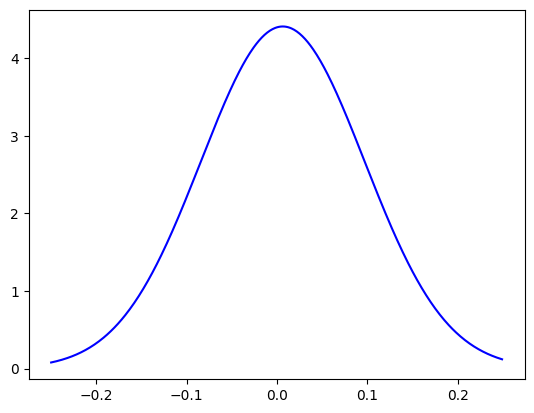

In [12]:
x = np.arange(-.25,.25,.001)
norm_dist = norm.pdf(x,port_mean,port_std)

plt.plot(x, norm_dist, color = 'b')
plt.show()

In [13]:
confidence_level=.05
VaR = norm.ppf(confidence_level,port_mean, port_std)
VaR # we have 95%surity that our portfolio wont loose more than 14.5% in one day

-0.14253451440392262

In [14]:
num_days = 5 #for 5 days
VaR * np.sqrt(num_days)


-0.3187168633470939

In [15]:
lower = port_mean - 2* port_std / np.sqrt(count)
higher= port_mean + 2* port_std / np.sqrt(count)
#tells that weare 95% confident that our daily return of portfolio will be between lower and higher range

In [16]:
lower

0.0013016338543048412

In [17]:
higher

0.01130176511560907